In [41]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(14,8)})

## Merge Pokemon datasets

In [81]:
df = pd.read_csv('Pokemon.csv')
df2 = pd.read_csv('pokemon2.csv')
df3 = df.merge(df2, on=['#'], how='right')
df = df3

In [78]:
df.head()

,#,Name_x,Type 1_x,Type 2_x,Total,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,...,Weight,Base Experience,Type 1_y,Type 2_y,HP_y,Attack_y,Defense_y,Speed_y,Sp. Atk_y,Sp. Def_y
0,1,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,...,6.9,64,grass,poison,45,49,49,45,65,65
1,2,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,...,13.0,142,grass,poison,60,62,63,60,80,80
2,3,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,...,100.0,236,grass,poison,80,82,83,80,100,100
3,3,VenusaurMega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,...,100.0,236,grass,poison,80,82,83,80,100,100
4,4,Charmander,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,...,8.5,62,fire,NaN,39,52,43,65,60,50


In [82]:
df.tail()

,#,Name_x,Type 1_x,Type 2_x,Total,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,...,Weight,Base Experience,Type 1_y,Type 2_y,HP_y,Attack_y,Defense_y,Speed_y,Sp. Atk_y,Sp. Def_y
881,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.8,189,poison,NaN,67,73,67,73,73,67
882,804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,243,poison,dragon,73,73,73,121,127,73
883,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,820.0,257,rock,steel,61,131,211,13,53,101
884,806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,257,fire,ghost,53,127,53,107,151,79
885,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.5,270,electric,NaN,88,112,75,143,102,80


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 885
Data columns (total 26 columns):
#                  886 non-null int64
Name_x             800 non-null object
Type 1_x           800 non-null object
Type 2_x           414 non-null object
Total              800 non-null float64
HP_x               800 non-null float64
Attack_x           800 non-null float64
Defense_x          800 non-null float64
Sp. Atk_x          800 non-null float64
Sp. Def_x          800 non-null float64
Speed_x            800 non-null float64
Generation_x       800 non-null float64
Legendary          800 non-null object
Name_y             886 non-null object
Generation_y       886 non-null int64
Height             886 non-null float64
Weight             886 non-null float64
Base Experience    886 non-null int64
Type 1_y           886 non-null object
Type 2_y           461 non-null object
HP_y               886 non-null int64
Attack_y           886 non-null int64
Defense_y          886 non-null 

### Fix legendary

In [84]:
gen7_legendary_numbers = [772, 773, 785, 786, 787, 788, 789, 790, 791, 792, 800]
df.loc[df['Generation_y'] == 7, 'Legendary'] = False

df.loc[df['#'].isin(gen7_legendary_numbers), 'Legendary'] = True

### Fix all status

In [85]:
x_columns = ['Name','Type 1','Type 2','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']

for column in x_columns:
    df.loc[df[column+'_x'].isna(), column+'_x'] = df[column+'_y']

### Remove '_y' columns and rename '_x' columns

In [86]:
df = df.drop(columns=['Name_y', 'Type 1_y','Type 2_y','Total','HP_y','Attack_y','Defense_y','Sp. Atk_y','Sp. Def_y','Speed_y','Generation_y'], axis=1)
df.rename(columns=lambda x: x.replace('_x', ''), inplace=True)

df['Type 1'] = map(lambda x: str(x).capitalize(), df['Type 1'])
df['Type 2'] = map(lambda x: x if x != x else str(x).capitalize(), df['Type 2'])
df['Name'] = map(lambda x: str(x).capitalize(), df['Name'])

df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,1.0,13.0,142
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,2.0,100.0,236
3,3,Venusaurmega venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,2.0,100.0,236
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62


In [88]:
df.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience
881,803,Poipole,Poison,NaN,67.0,73.0,67.0,73.0,67.0,73.0,7.0,False,0.6,1.8,189
882,804,Naganadel,Poison,Dragon,73.0,73.0,73.0,127.0,73.0,121.0,7.0,False,3.6,150.0,243
883,805,Stakataka,Rock,Steel,61.0,131.0,211.0,53.0,101.0,13.0,7.0,False,5.5,820.0,257
884,806,Blacephalon,Fire,Ghost,53.0,127.0,53.0,151.0,79.0,107.0,7.0,False,1.8,13.0,257
885,807,Zeraora,Electric,NaN,88.0,112.0,75.0,102.0,80.0,143.0,7.0,False,1.5,44.5,270


### Adding Mega evolution column

In [89]:
df['Mega'] = False

In [93]:
df.loc[df['Name'].str.contains("mega "), 'Mega'] = True

In [94]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64,False
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,1.0,13.0,142,False
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,2.0,100.0,236,False
3,3,Venusaurmega venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,2.0,100.0,236,True
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62,False


In [95]:
df.loc[df['Name'].str.contains("Mega")]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega
168,154,Meganium,Grass,NaN,80.0,82.0,100.0,83.0,100.0,80.0,2.0,False,1.8,100.5,236,False


In [96]:
types1 = df['Type 1'].unique()
types1_colors = ['#7AC74C', '#EE8130', '#6390F0', '#A6B91A', 
                 '#A8A77A', '#A33EA1', '#F7D02C', '#E2BF65', '#D685AD', '#C22E28', '#F95587', '#B6A136',
                 '#735797', '#96D9D6', '#6F35FC', '#705746', '#B7B7CE', '#A98FF3'
                ]

type1_colors = {}

for i, type1 in enumerate(types1):
    type1_colors[type1] = types1_colors[i]

Text(0.5,1,u'Pokemon first type sum')

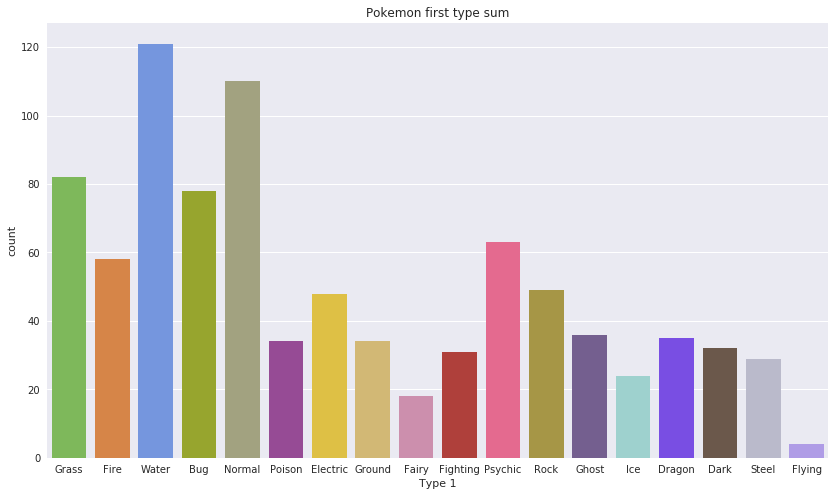

In [97]:
sns.countplot(x="Type 1", data=df, palette=type1_colors).set_title('Pokemon first type sum')

Text(0.5,1,u'Pokemon first type sum')

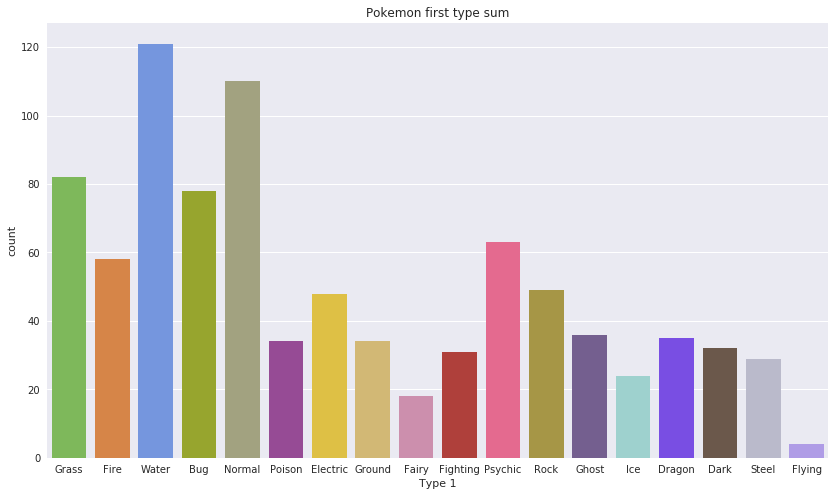

In [98]:
sns.countplot(x="Type 1", data=df, palette=type1_colors).set_title('Pokemon first type sum')

Text(0.5,1,u'Pokemon second type sum')

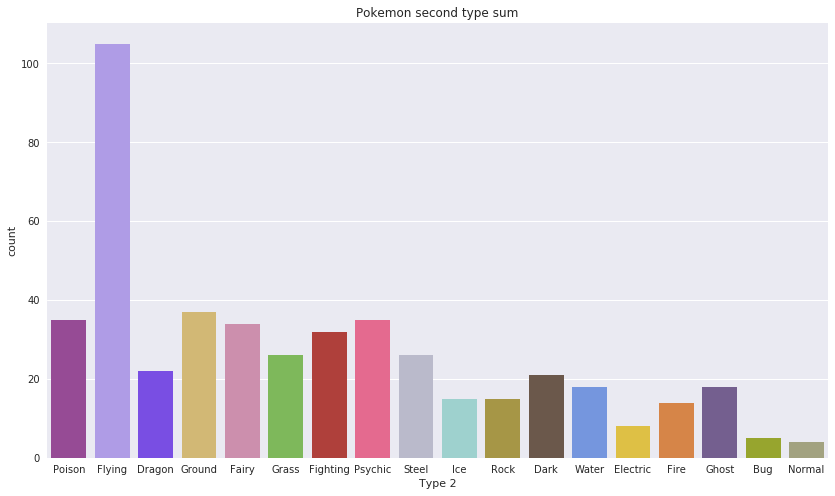

In [99]:
sns.countplot(x="Type 2", data=df, palette=type1_colors).set_title('Pokemon second type sum')

Text(0.5,1,u'Pure type Pokemons sum')

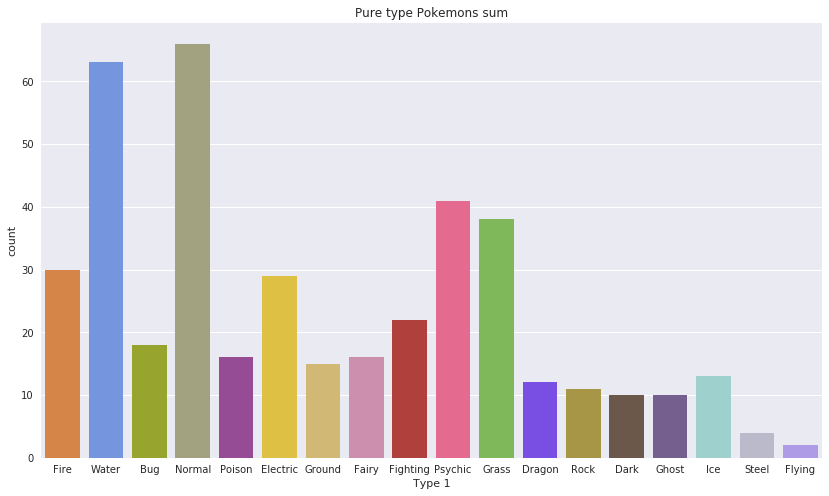

In [100]:
sns.countplot(x="Type 1", data=df.loc[df['Type 2'].isna()], palette=type1_colors).set_title('Pure type Pokemons sum')

Text(0.5,1,u'(not) Pure type Pokemons sum')

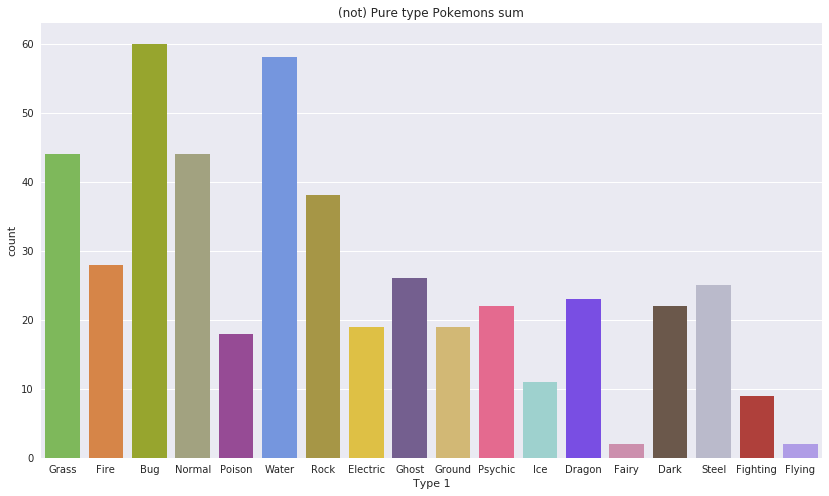

In [101]:
sns.countplot(x="Type 1", data=df.loc[df['Type 2'].notnull()], palette=type1_colors).set_title('(not) Pure type Pokemons sum')

In [102]:
df.nlargest(10, 'Attack')

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega
163,150,Mewtwomega mewtwo x,Psychic,Fighting,106.0,190.0,100.0,154.0,100.0,130.0,1.0,True,2.0,122.0,306,True
232,214,Heracrossmega heracross,Bug,Fighting,80.0,185.0,115.0,40.0,105.0,75.0,2.0,False,1.5,54.0,175,True
876,798,Kartana,Grass,Steel,59.0,181.0,131.0,59.0,31.0,109.0,7.0,False,0.3,0.1,257,False
424,383,Groudonprimal groudon,Ground,Fire,100.0,180.0,160.0,150.0,90.0,90.0,3.0,True,3.5,950.0,302,False
426,384,Rayquazamega rayquaza,Dragon,Flying,105.0,180.0,100.0,180.0,100.0,115.0,3.0,True,7.0,206.5,306,True
429,386,Deoxysattack forme,Psychic,NaN,50.0,180.0,20.0,180.0,20.0,150.0,3.0,True,1.7,60.8,270,False
494,445,Garchompmega garchomp,Dragon,Ground,108.0,170.0,115.0,120.0,95.0,92.0,4.0,False,1.9,95.0,270,True
711,646,Kyuremblack kyurem,Dragon,Ice,125.0,170.0,100.0,120.0,90.0,95.0,5.0,True,3.0,325.0,297,False
387,354,Banettemega banette,Ghost,NaN,64.0,165.0,75.0,93.0,83.0,75.0,3.0,False,1.1,12.5,159,True
454,409,Rampardos,Rock,NaN,97.0,165.0,60.0,65.0,50.0,58.0,4.0,False,1.6,102.5,173,False


Text(0.5,1,u'Top 10 Highest Attack')

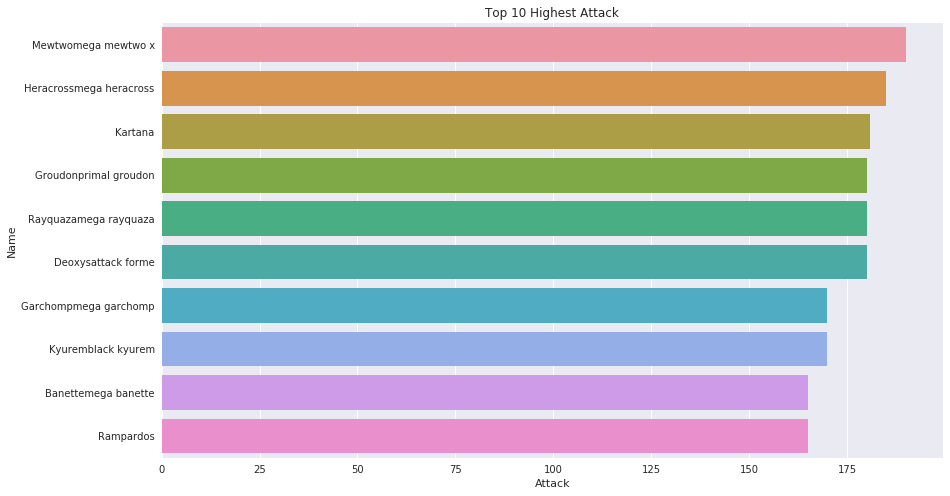

In [103]:
sns.barplot(x="Attack", y='Name', data=df.nlargest(10, 'Attack')).set_title('Top 10 Highest Attack')

Text(0.5,1,u'Top 10 Highest Attack (No Legendary)')

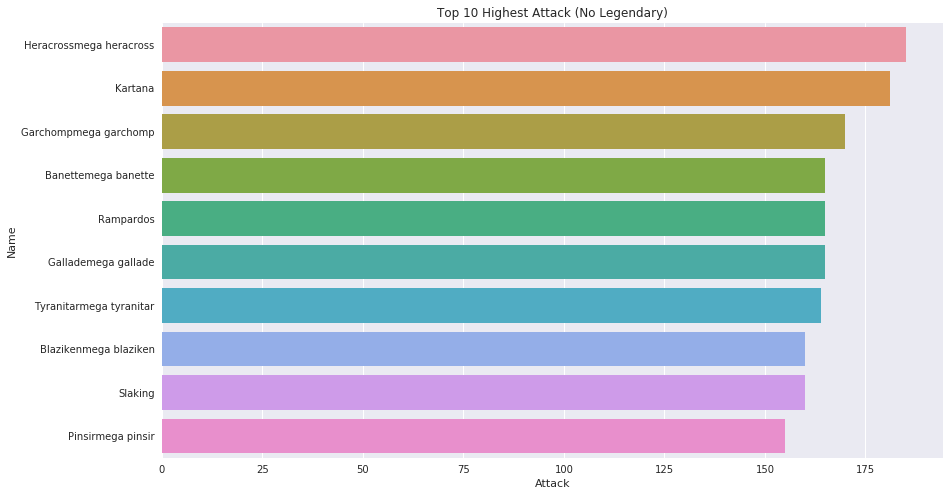

In [104]:
sns.barplot(x="Attack", y='Name', data=df.loc[df.Legendary == False].nlargest(10, 'Attack')).set_title('Top 10 Highest Attack (No Legendary)')

Text(0.5,1,u'Top 10 Highest Attack (No Mega)')

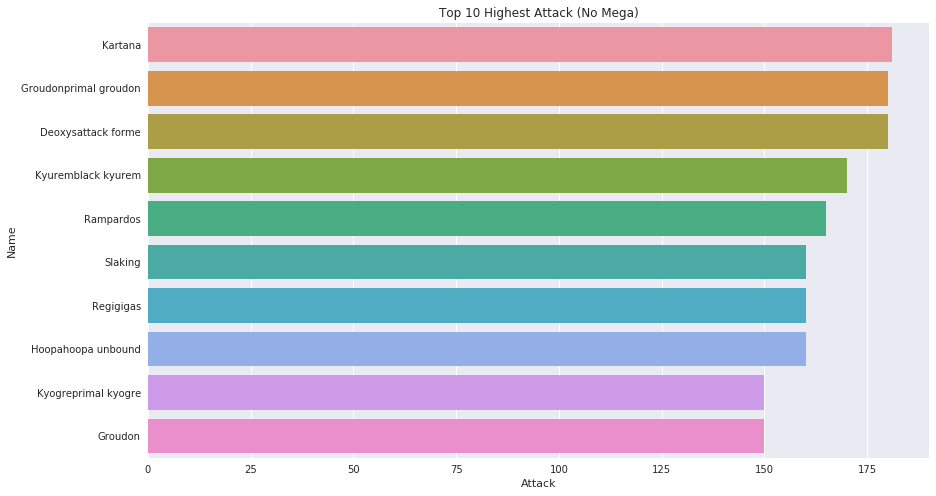

In [105]:
sns.barplot(x="Attack", y='Name', data=df.loc[df.Mega == False].nlargest(10, 'Attack')).set_title('Top 10 Highest Attack (No Mega)')

Text(0.5,1,u'Top 10 Highest Attack (No Legendary and No Mega)')

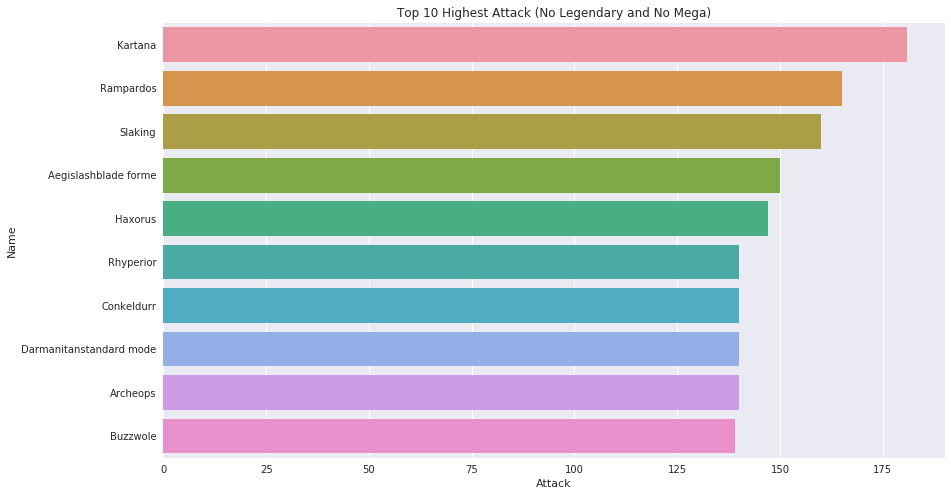

In [106]:
sns.barplot(x="Attack", y='Name', data=df.loc[((df.Legendary == False) & (df.Mega == False))].nlargest(10, 'Attack')).set_title('Top 10 Highest Attack (No Legendary and No Mega)')

Text(0.5,1,u'Top 10 Highest HP')

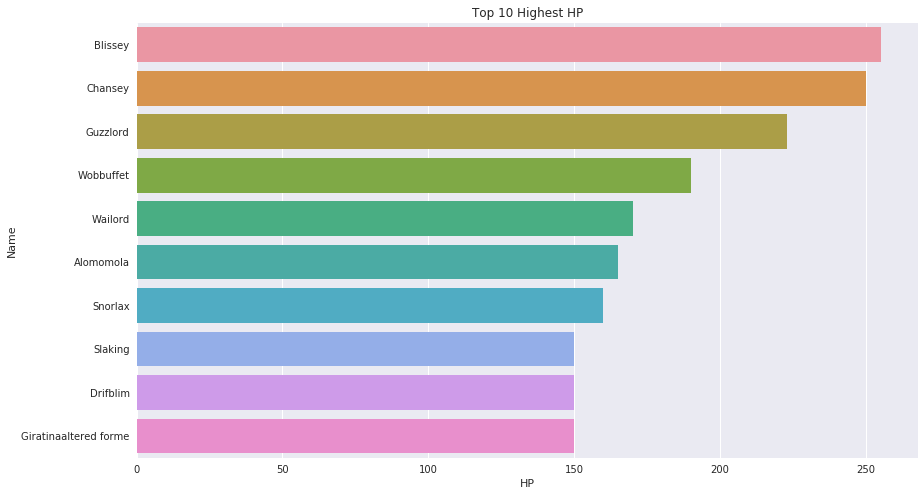

In [107]:
sns.barplot(x="HP", y='Name', data=df.nlargest(10, 'HP')).set_title('Top 10 Highest HP')

Text(0.5,1,u'Top 10 Highest Defense')

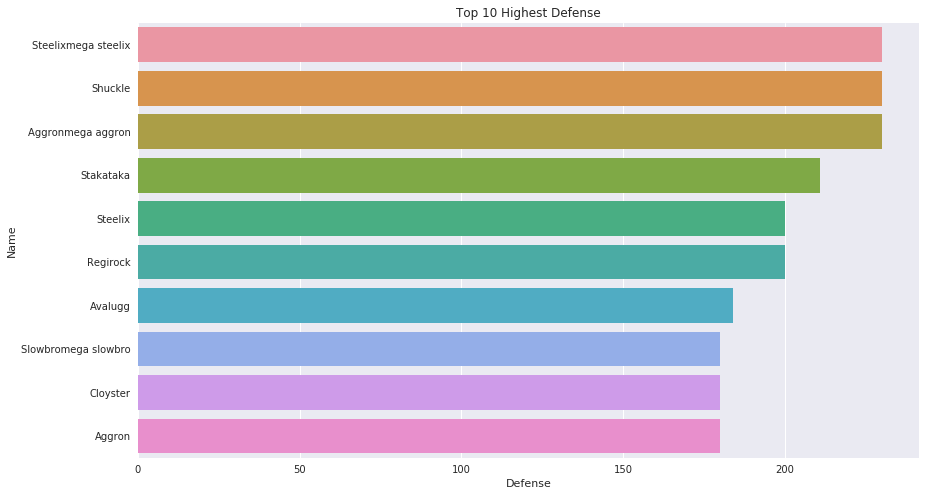

In [108]:
sns.barplot(x="Defense", y='Name', data=df.nlargest(10, 'Defense')).set_title('Top 10 Highest Defense')

Text(0.5,1,u'Top 10 Highest Speed')

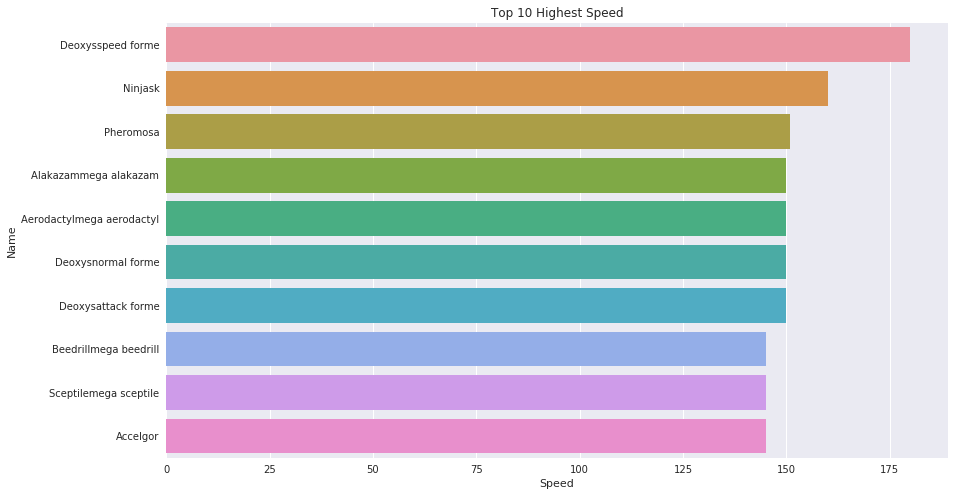

In [109]:
sns.barplot(x="Speed", y='Name', data=df.nlargest(10, 'Speed')).set_title('Top 10 Highest Speed')

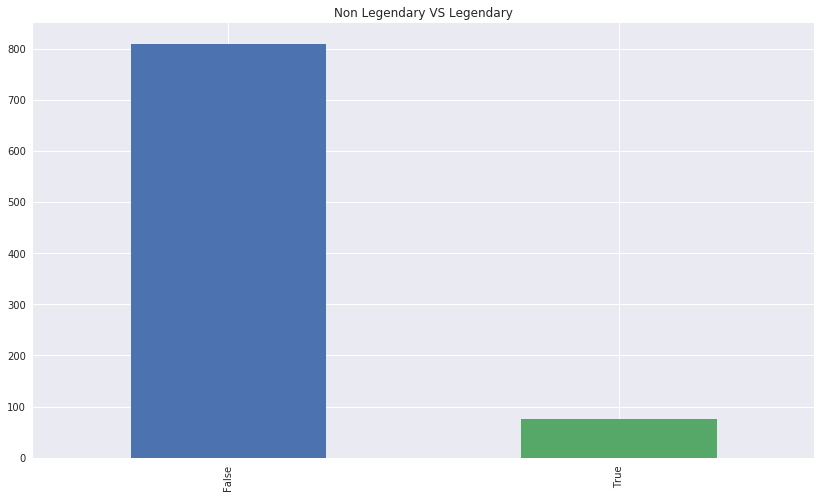

In [110]:
# sns.countplot(x="Legendary",  data=df['Generation']).set_title('(not) Pure type Pokemons sum')
df.Legendary.value_counts(normalize=False).plot(kind='bar', title='Non Legendary VS Legendary')

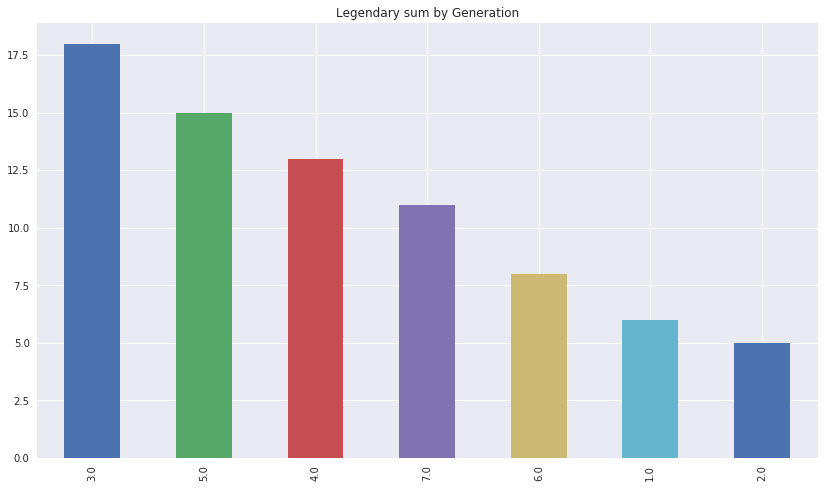

In [111]:
df.Generation[df.Legendary == True].value_counts().plot(kind='bar', title='Legendary sum by Generation')
# sns.countplot(x="Generation", y='Legendary', data=df.loc[df.Legendary == True]).set_title('(not) Pure type Pokemons sum')

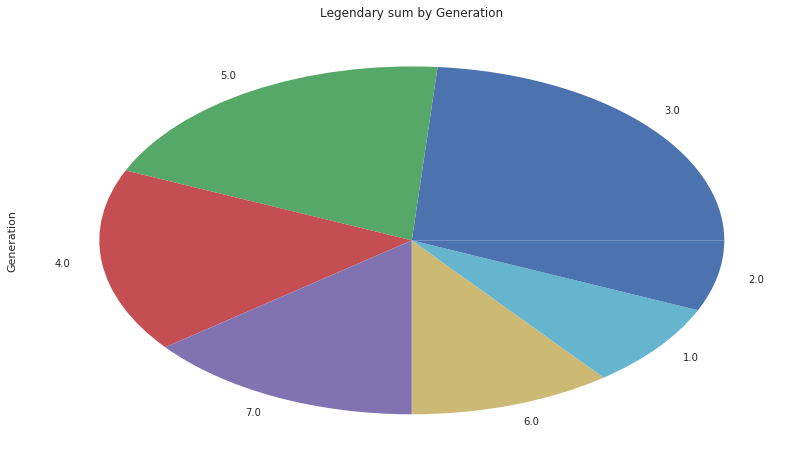

In [112]:
df.Generation[df.Legendary == True].value_counts().plot(kind='pie', title='Legendary sum by Generation')

## Merge data with level and add 'evolve' column

In [113]:
df_level = pd.read_csv('pokemon evolutions by level.csv')
# df.set_index(['#'], inplace=True)

In [114]:
df['Evolve at'] = 0
df['Evolve'] = False
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega,Evolve at,Evolve
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64,False,0,False
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,1.0,13.0,142,False,0,False
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,2.0,100.0,236,False,0,False
3,3,Venusaurmega venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,2.0,100.0,236,True,0,False
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62,False,0,False


In [115]:
for index, row in df_level.iterrows():
    df.loc[df['#'] == row['Ndex'], 'Evolve at'] = row['Level']
    df.loc[df['#'] == row['Ndex'], 'Evolve'] = True

df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega,Evolve at,Evolve
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64,False,16,True
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,1.0,13.0,142,False,32,True
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,2.0,100.0,236,False,0,False
3,3,Venusaurmega venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,2.0,100.0,236,True,0,False
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62,False,16,True


In [116]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega,Evolve at,Evolve
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64,False,16,True
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,1.0,13.0,142,False,32,True
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,2.0,100.0,236,False,0,False
3,3,Venusaurmega venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,2.0,100.0,236,True,0,False
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62,False,16,True


### Starters

In [117]:
df_starter1 = df.loc[df['#'].isin([1, 4,7,
                           152, 155,158,
                           252,255,258,
                           387,390,393,
                           495,498,501,
                           650,653,656,
                            722, 725, 728
                          ])]
df_starter1

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega,Evolve at,Evolve
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64,False,16,True
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62,False,16,True
9,7,Squirtle,Water,NaN,44.0,48.0,65.0,50.0,64.0,43.0,1.0,False,0.5,9.0,63,False,16,True
166,152,Chikorita,Grass,NaN,45.0,49.0,65.0,49.0,65.0,45.0,2.0,False,0.9,6.4,64,False,16,True
169,155,Cyndaquil,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,2.0,False,0.5,7.9,62,False,14,True
172,158,Totodile,Water,NaN,50.0,65.0,64.0,44.0,48.0,43.0,2.0,False,0.6,9.5,63,False,18,True
272,252,Treecko,Grass,NaN,40.0,45.0,35.0,65.0,55.0,70.0,3.0,False,0.5,5.0,62,False,16,True
276,255,Torchic,Fire,NaN,45.0,60.0,40.0,70.0,50.0,45.0,3.0,False,0.4,2.5,62,False,16,True
280,258,Mudkip,Water,NaN,50.0,70.0,50.0,50.0,50.0,40.0,3.0,False,0.4,7.6,62,False,16,True
432,387,Turtwig,Grass,NaN,55.0,68.0,64.0,45.0,55.0,31.0,4.0,False,0.4,10.2,64,False,18,True


In [ ]:
df_starter1.pivot(index='Name', columns='ef', values='booked').plot(kind='bar')